Resultados para la función: sin(x)
  Número de nodos: 11, Método: equidistant


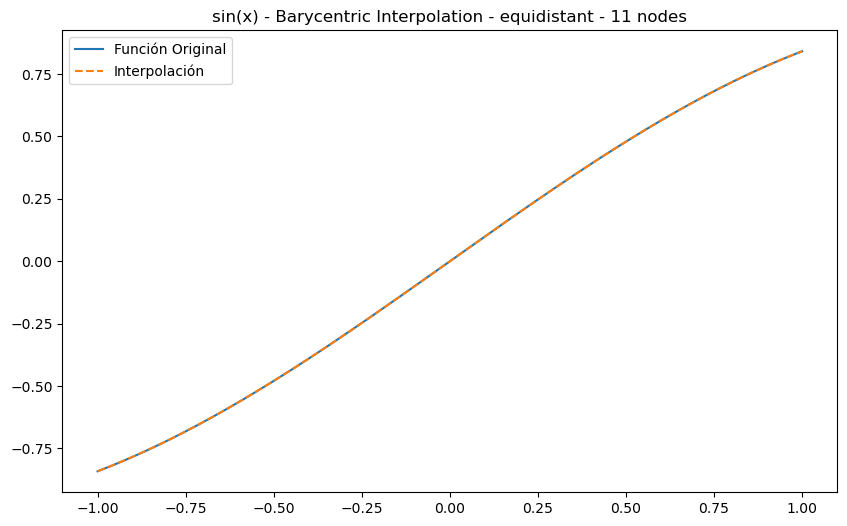

    Error Baricéntrico: 0.000000, Tiempo: 0.006494 segundos


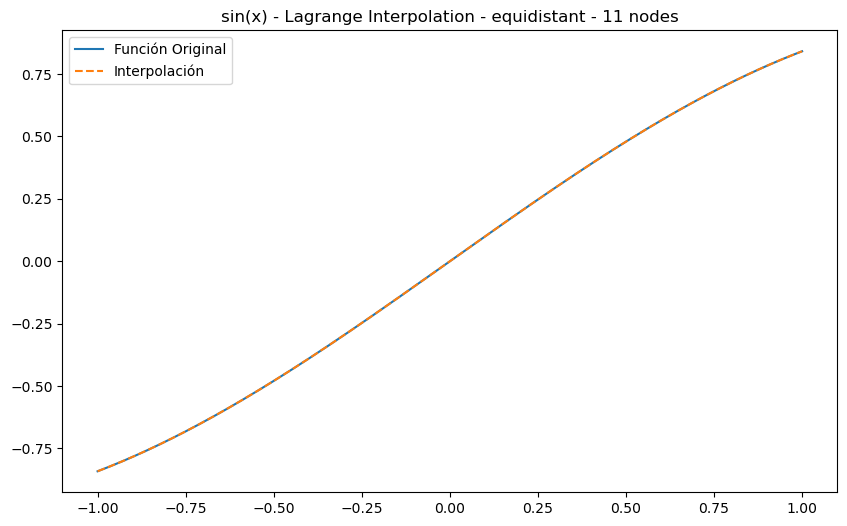

    Error Lagrange: 0.000000, Tiempo: 0.001866 segundos


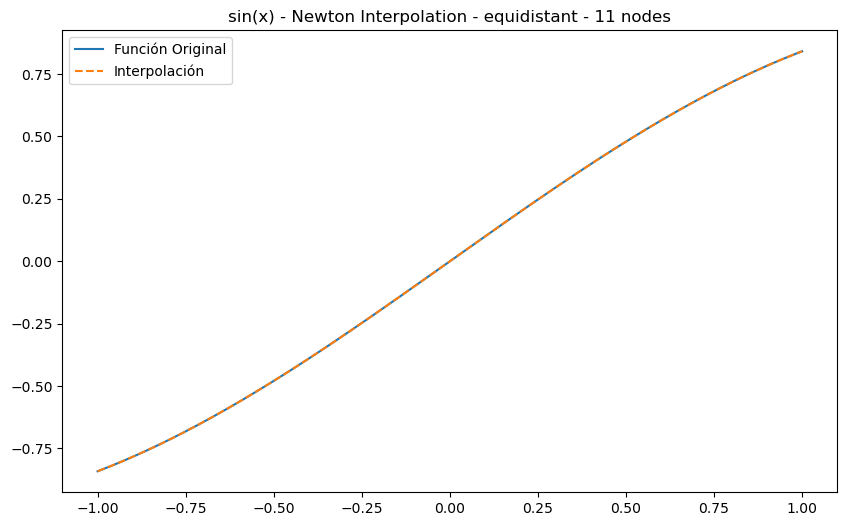

    Error Newton: 0.000000, Tiempo: 0.000846 segundos

  Número de nodos: 11, Método: chebyshev


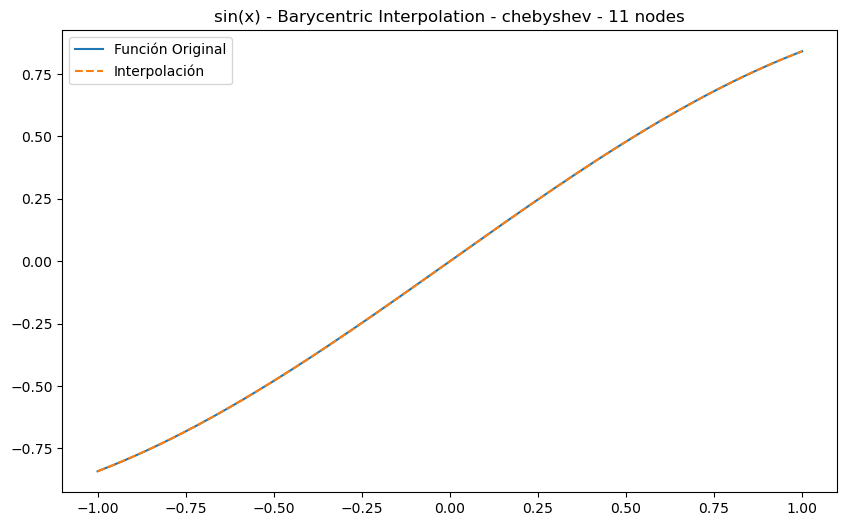

    Error Baricéntrico: 0.000000, Tiempo: 0.000185 segundos


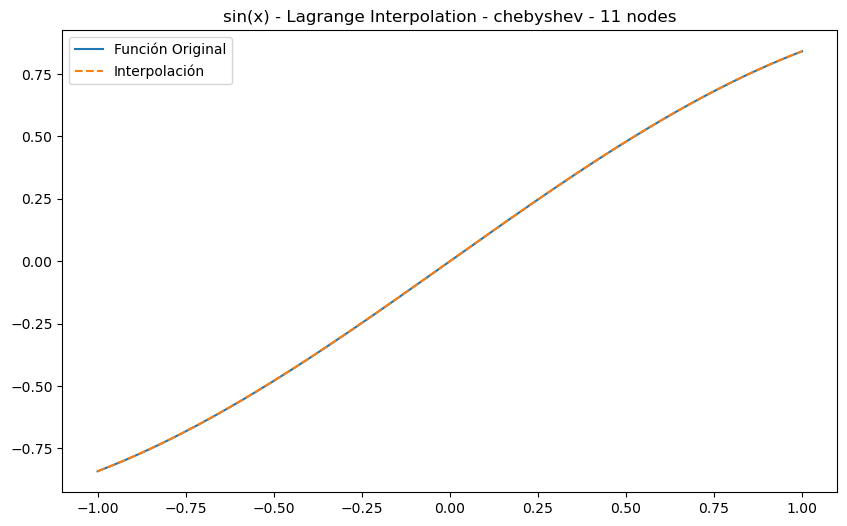

    Error Lagrange: 0.000000, Tiempo: 0.001319 segundos


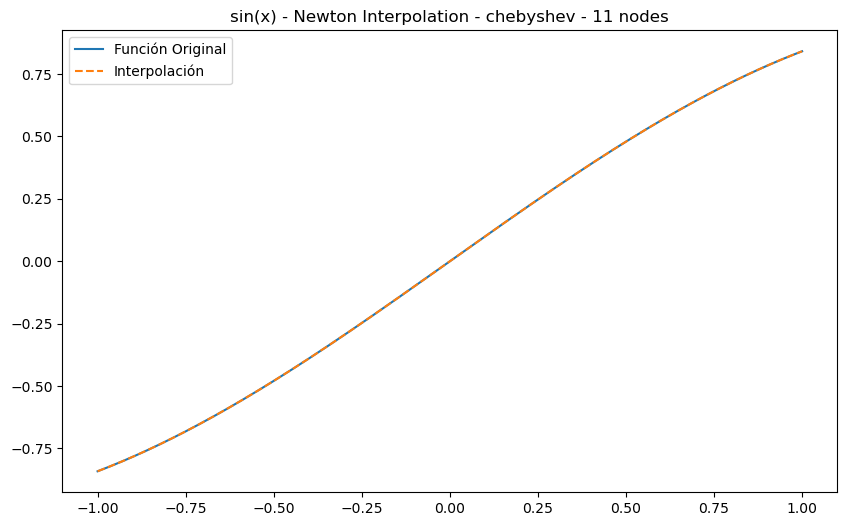

    Error Newton: 0.000000, Tiempo: 0.000792 segundos

  Número de nodos: 21, Método: equidistant


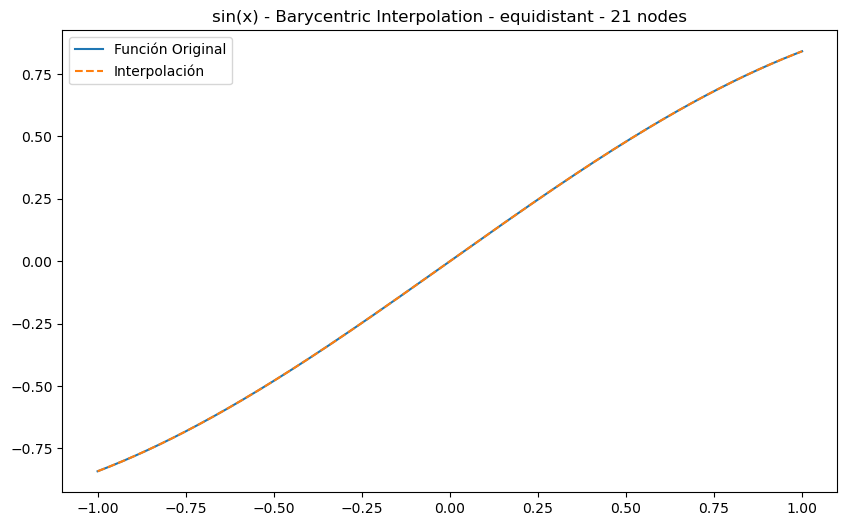

    Error Baricéntrico: 0.000000, Tiempo: 0.000508 segundos


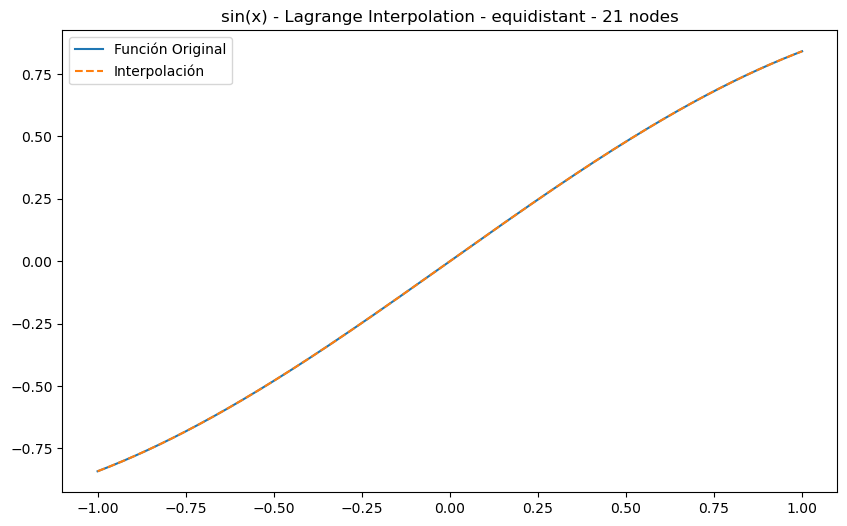

    Error Lagrange: 0.000000, Tiempo: 0.005049 segundos


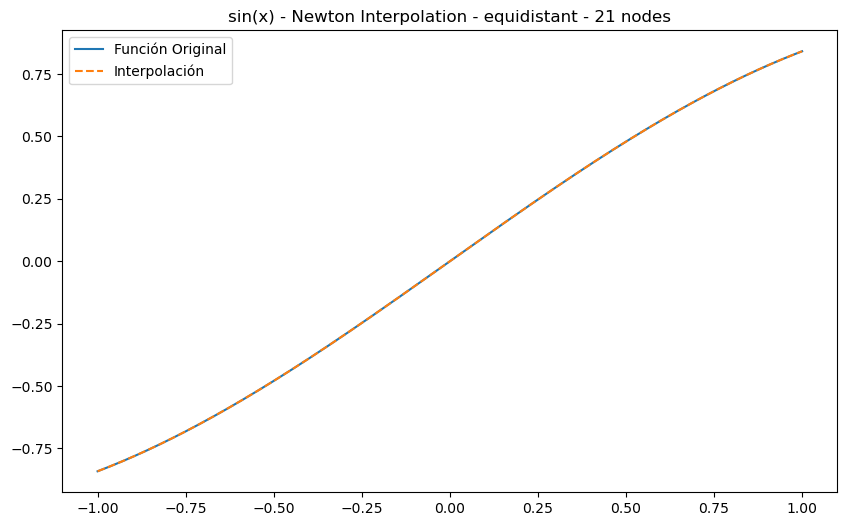

    Error Newton: 0.000000, Tiempo: 0.001590 segundos

  Número de nodos: 21, Método: chebyshev


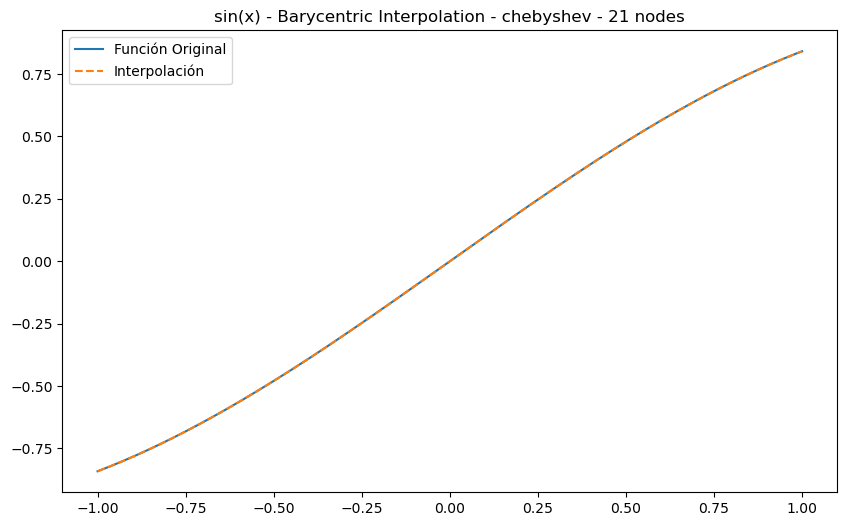

    Error Baricéntrico: 0.000000, Tiempo: 0.000696 segundos


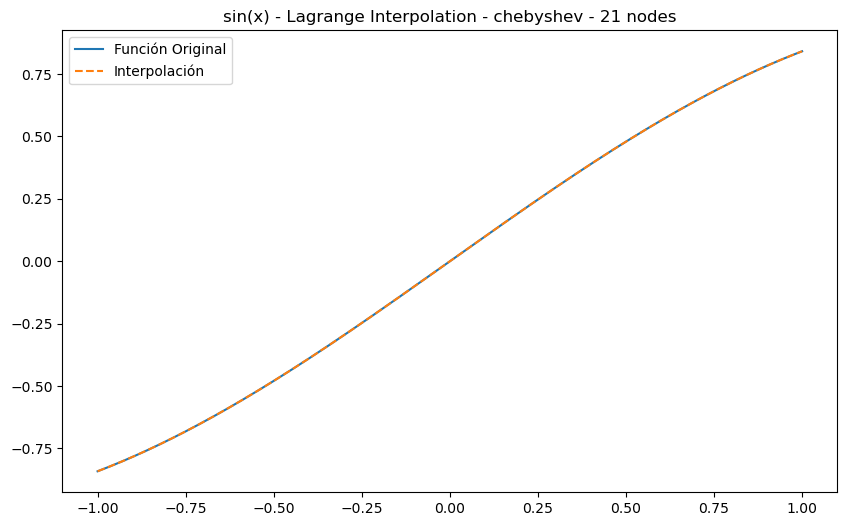

    Error Lagrange: 0.000000, Tiempo: 0.004907 segundos


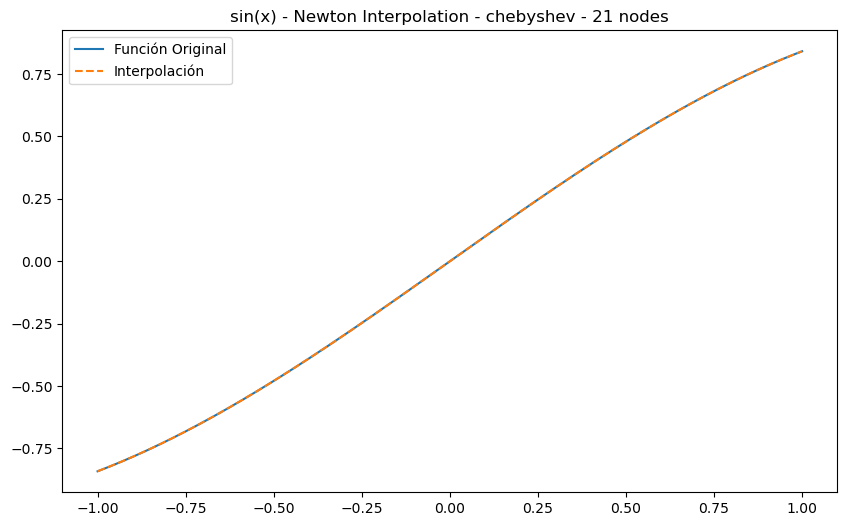

    Error Newton: 0.000000, Tiempo: 0.001505 segundos

Resultados para la función: 1 / (1 + 25x^2)
  Número de nodos: 11, Método: equidistant


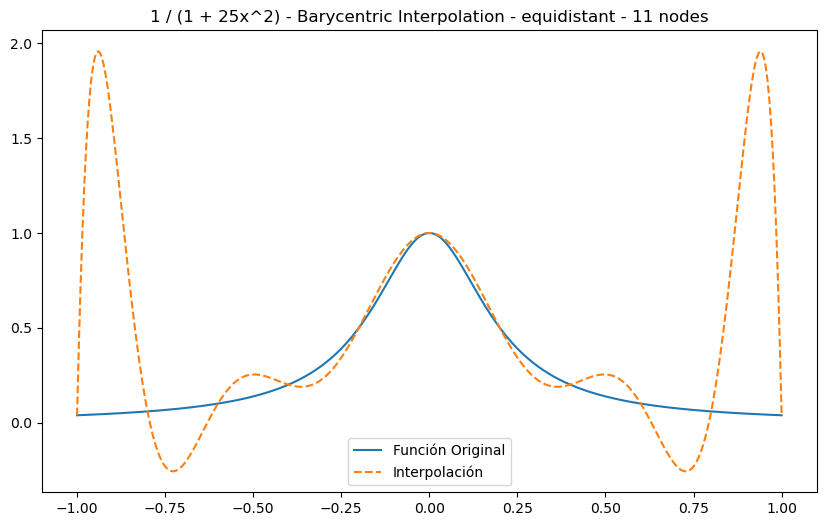

    Error Baricéntrico: 0.291309, Tiempo: 0.000385 segundos


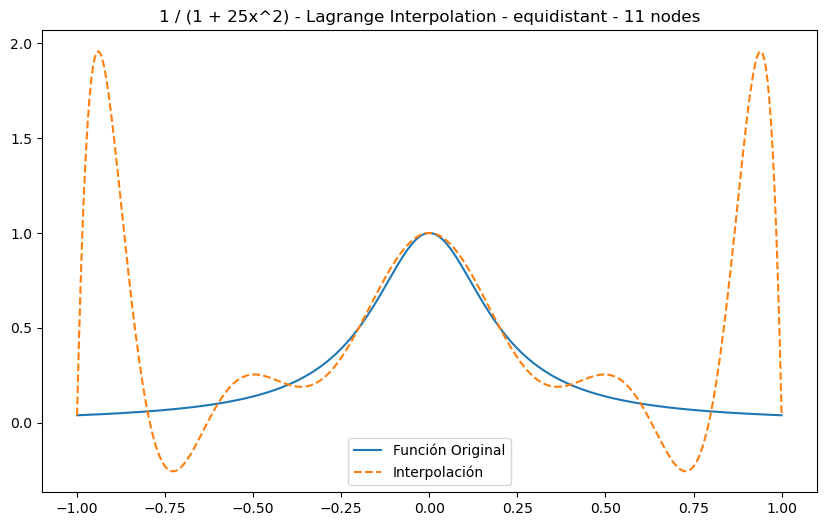

    Error Lagrange: 0.291309, Tiempo: 0.001309 segundos


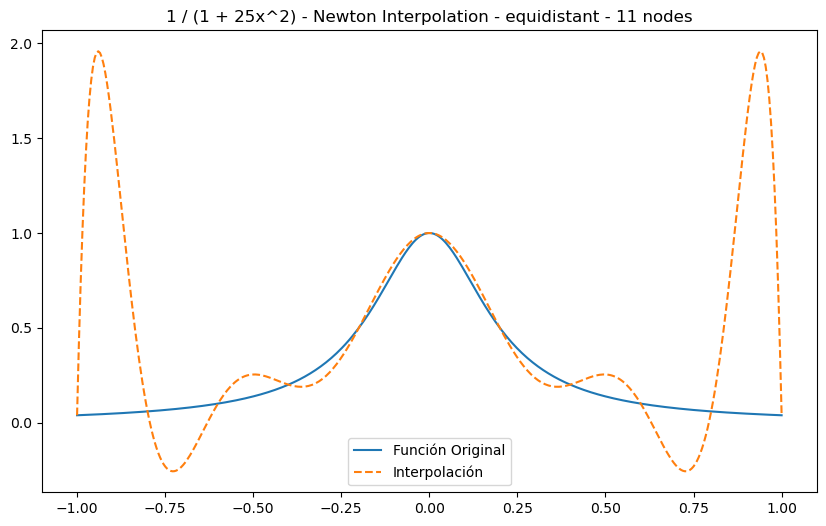

    Error Newton: 0.291309, Tiempo: 0.000834 segundos

  Número de nodos: 11, Método: chebyshev


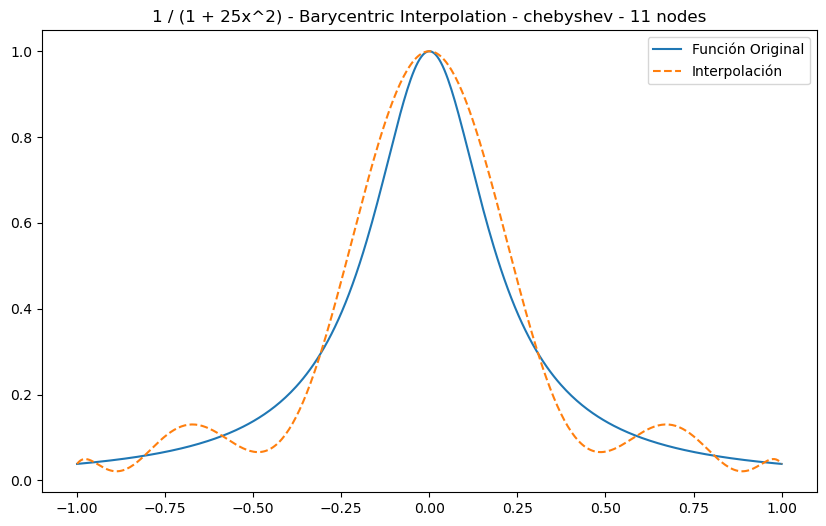

    Error Baricéntrico: 0.049164, Tiempo: 0.000279 segundos


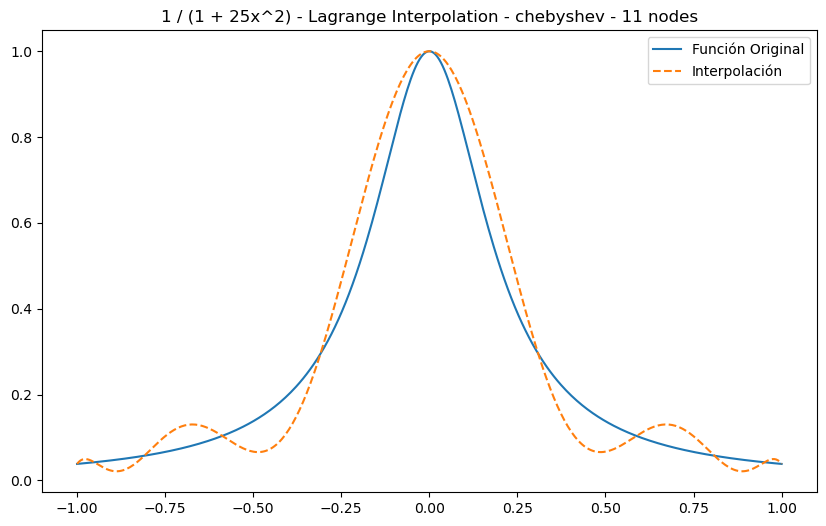

    Error Lagrange: 0.049164, Tiempo: 0.001408 segundos


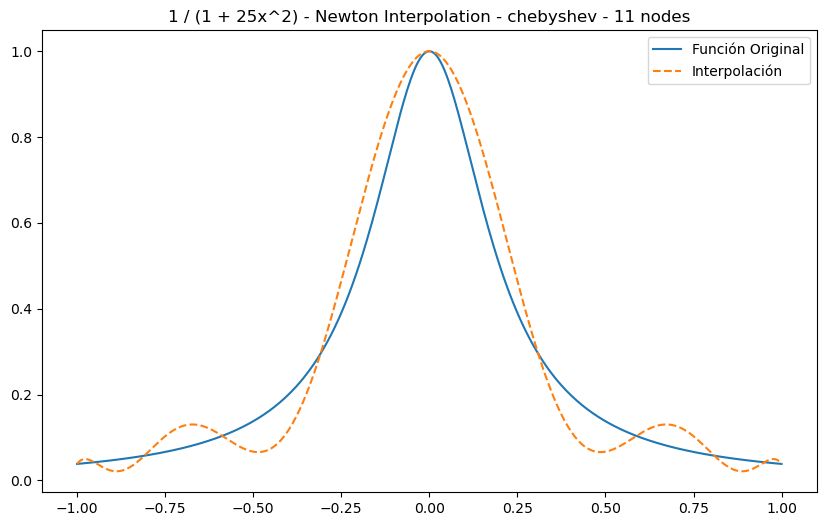

    Error Newton: 0.049164, Tiempo: 0.000840 segundos

  Número de nodos: 21, Método: equidistant


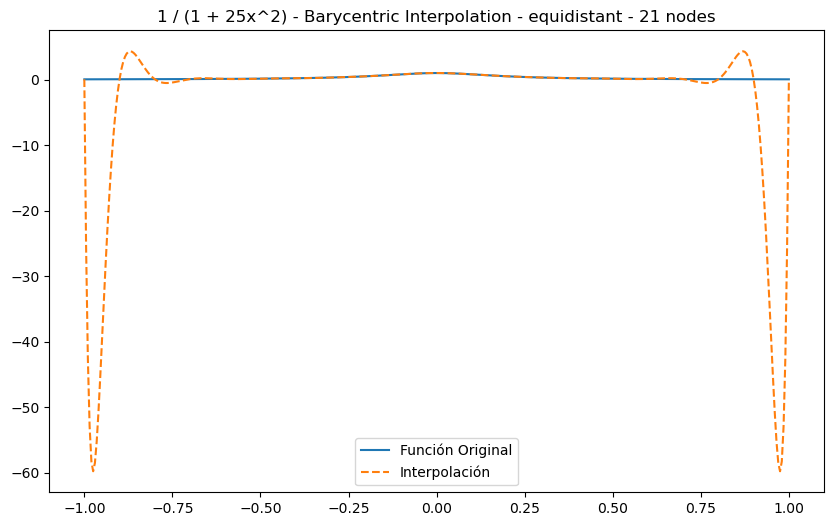

    Error Baricéntrico: 3.444759, Tiempo: 0.000810 segundos


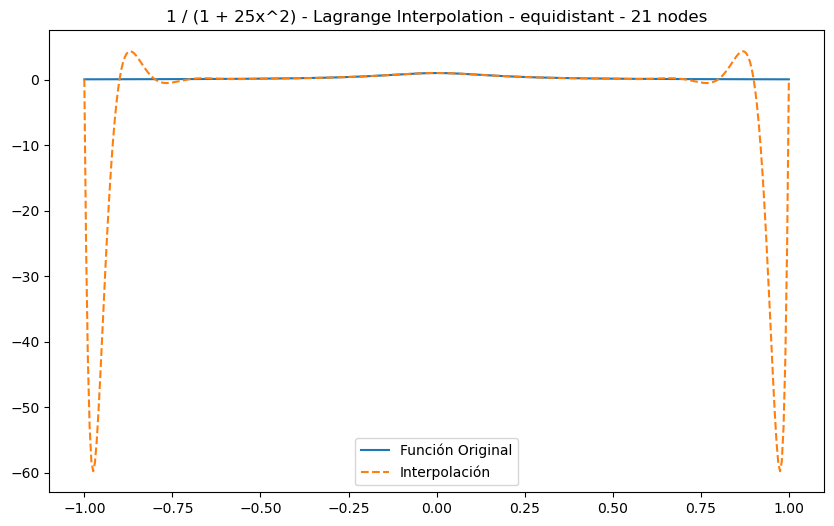

    Error Lagrange: 3.444759, Tiempo: 0.004870 segundos


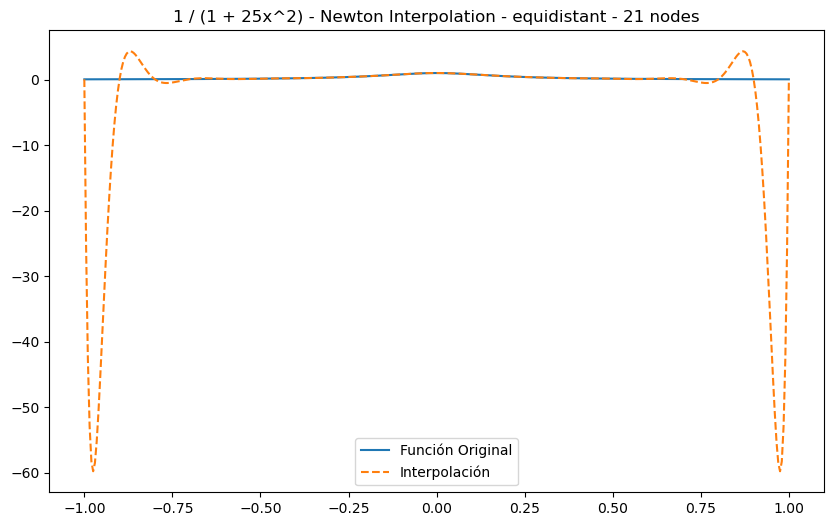

    Error Newton: 3.444759, Tiempo: 0.001598 segundos

  Número de nodos: 21, Método: chebyshev


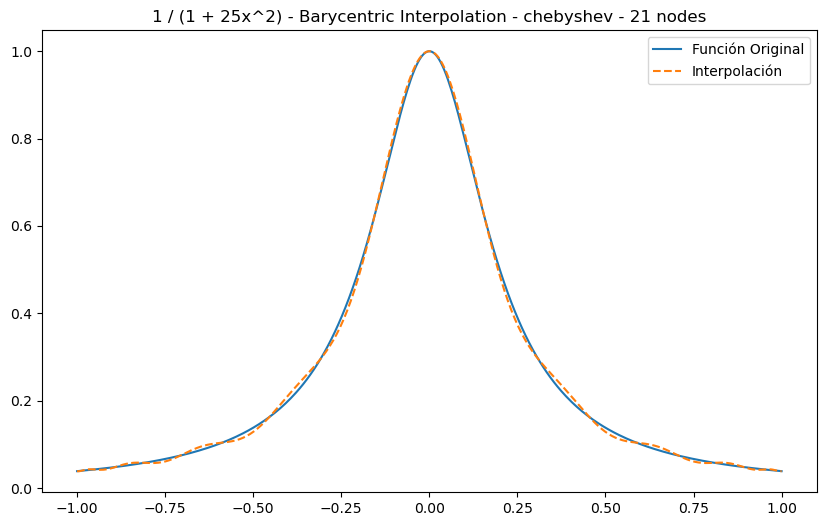

    Error Baricéntrico: 0.006421, Tiempo: 0.001112 segundos


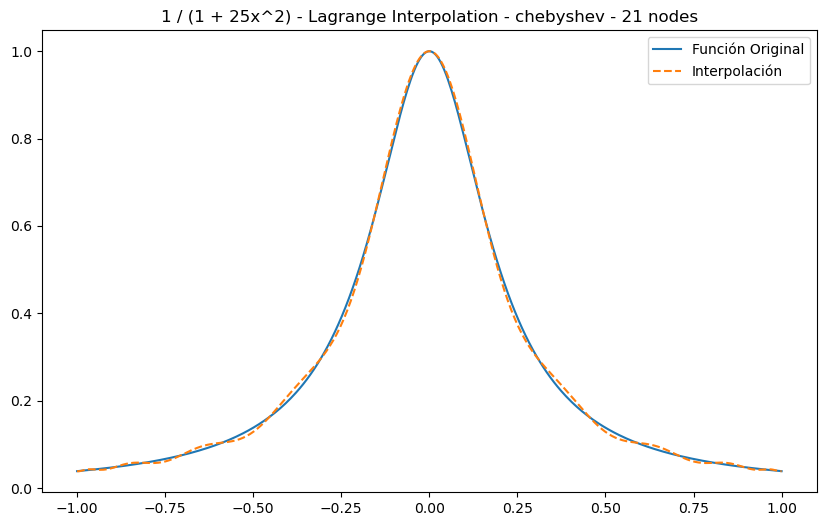

    Error Lagrange: 0.006421, Tiempo: 0.004766 segundos


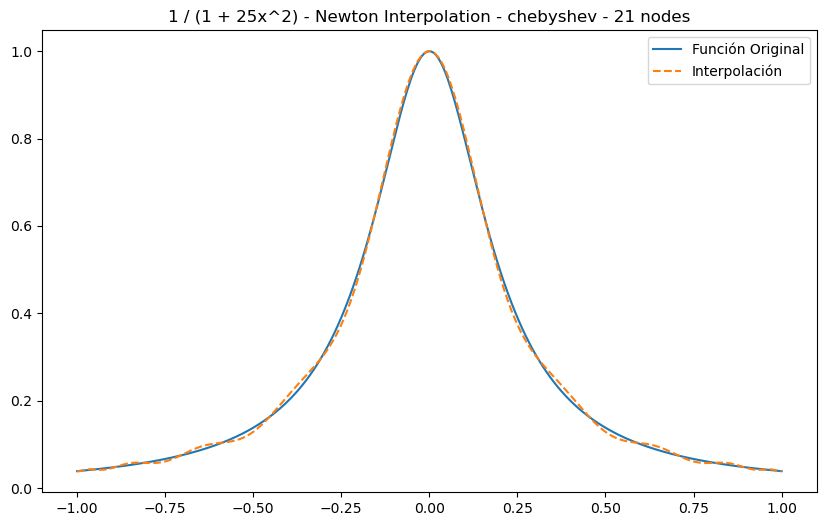

    Error Newton: 0.006421, Tiempo: 0.001591 segundos

Resultados para la función: e^(-20x^2)
  Número de nodos: 11, Método: equidistant


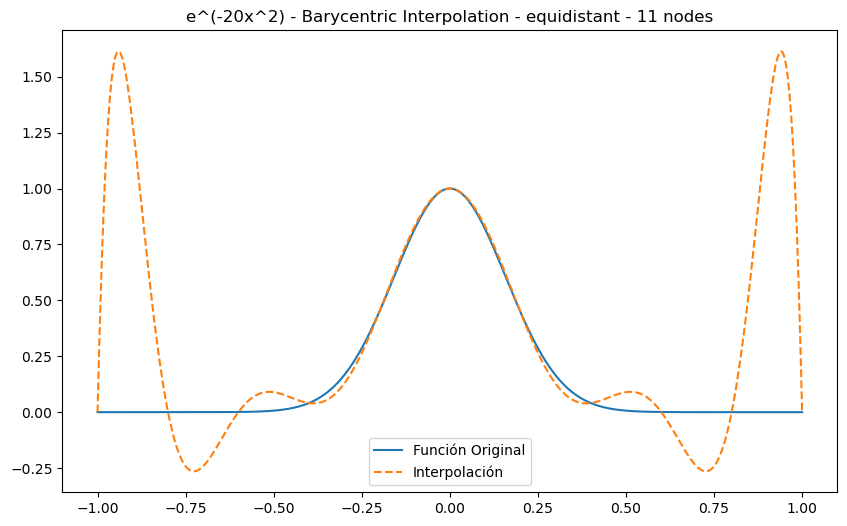

    Error Baricéntrico: 0.235532, Tiempo: 0.000511 segundos


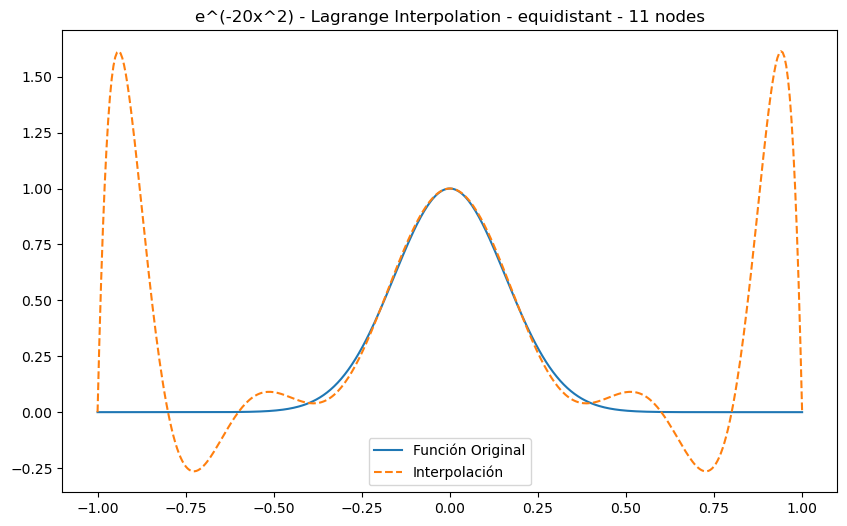

    Error Lagrange: 0.235532, Tiempo: 0.001320 segundos


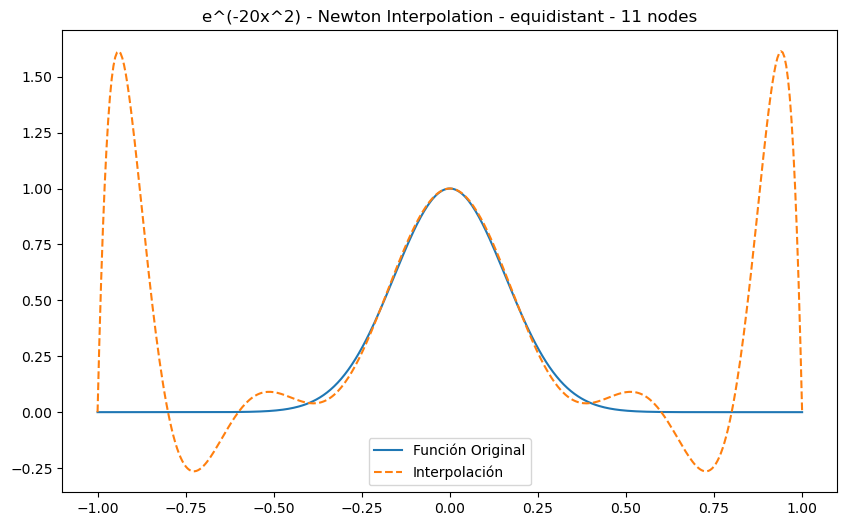

    Error Newton: 0.235532, Tiempo: 0.000813 segundos

  Número de nodos: 11, Método: chebyshev


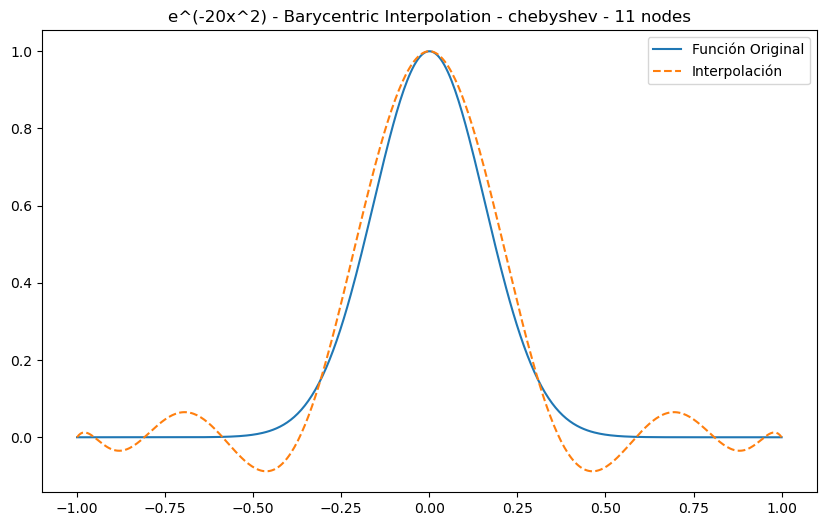

    Error Baricéntrico: 0.046074, Tiempo: 0.000589 segundos


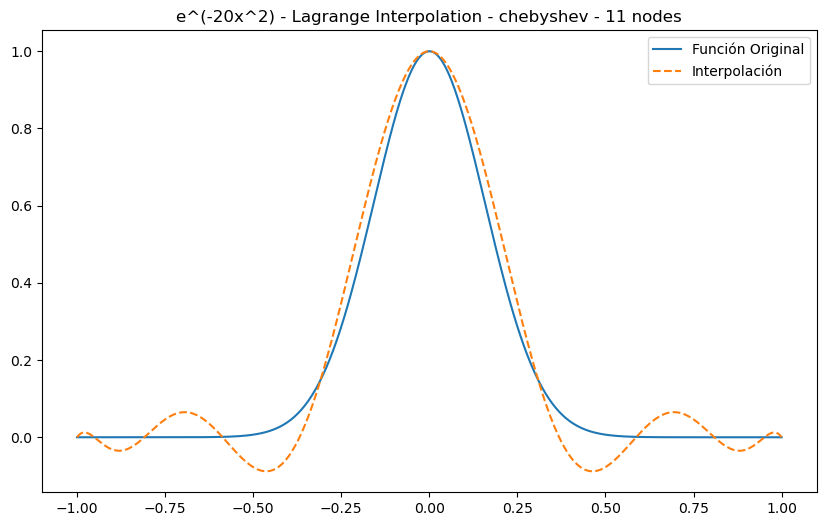

    Error Lagrange: 0.046074, Tiempo: 0.001334 segundos


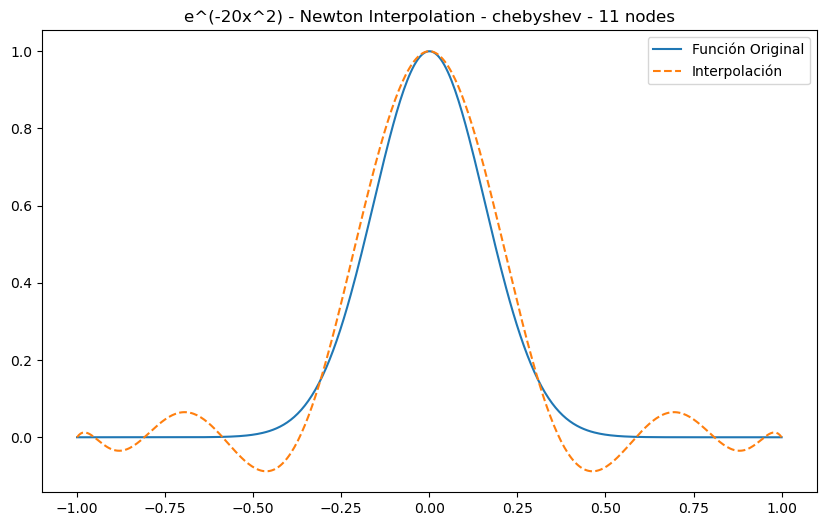

    Error Newton: 0.046074, Tiempo: 0.000822 segundos

  Número de nodos: 21, Método: equidistant


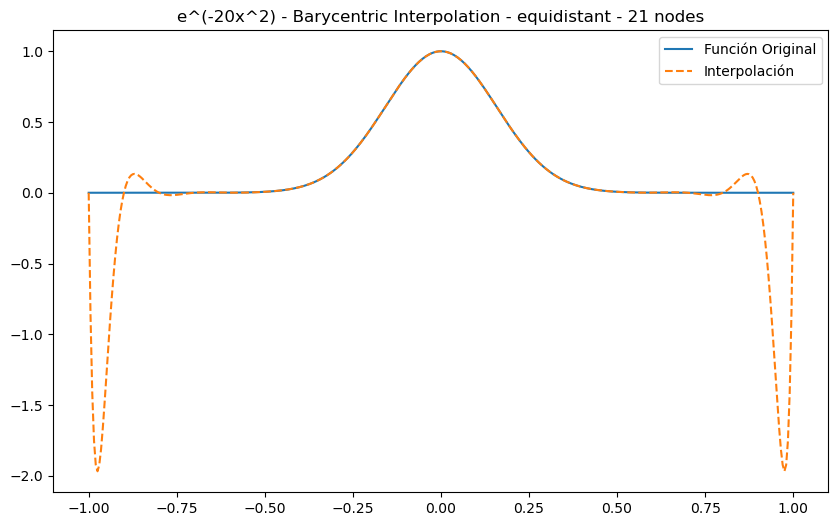

    Error Baricéntrico: 0.112096, Tiempo: 0.000562 segundos


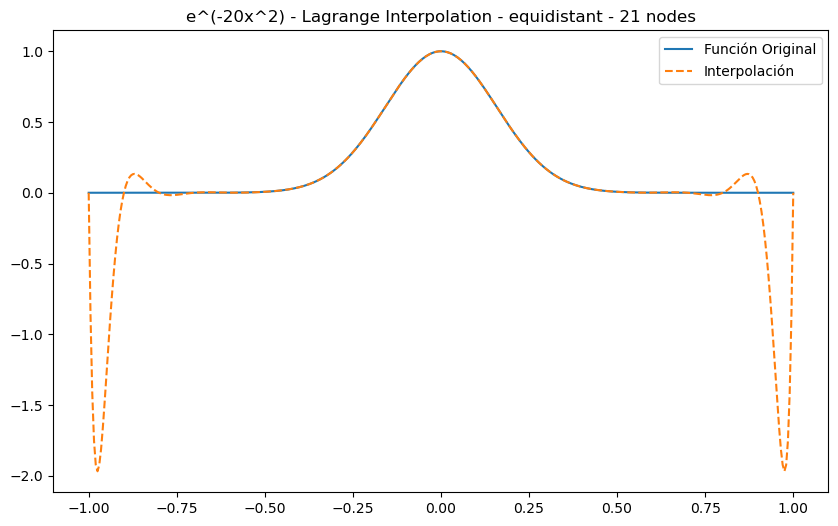

    Error Lagrange: 0.112096, Tiempo: 0.004802 segundos


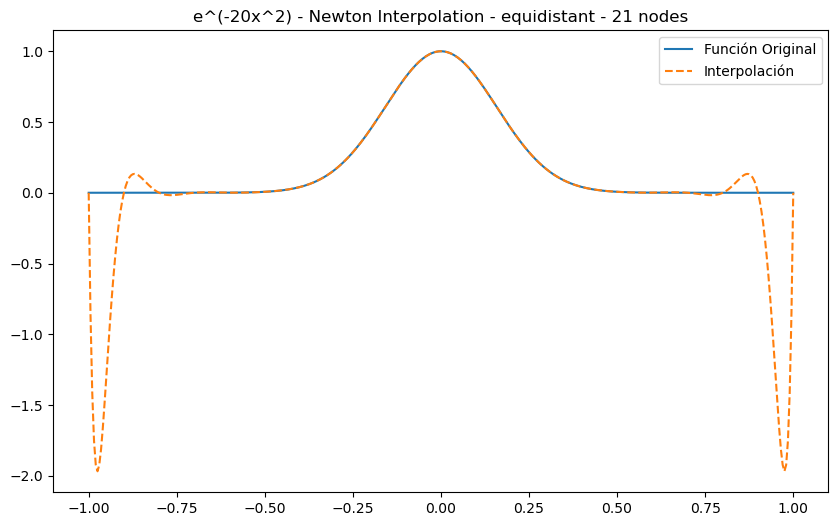

    Error Newton: 0.112096, Tiempo: 0.001607 segundos

  Número de nodos: 21, Método: chebyshev


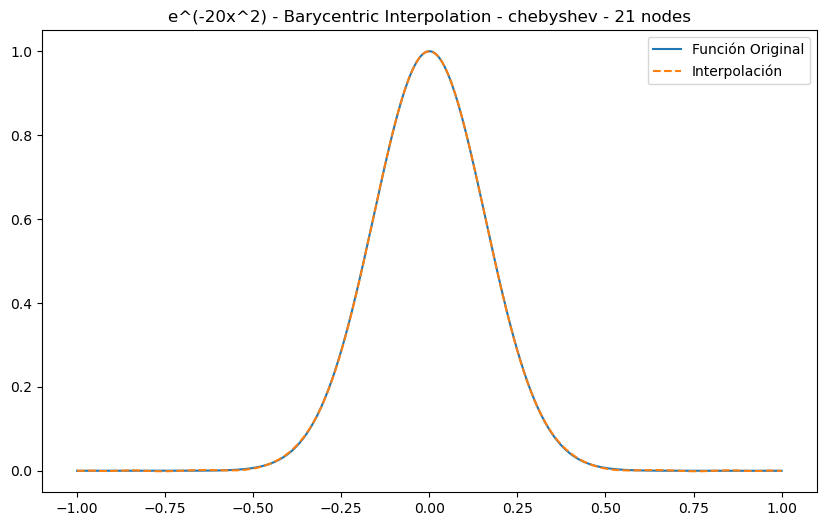

    Error Baricéntrico: 0.000782, Tiempo: 0.000544 segundos


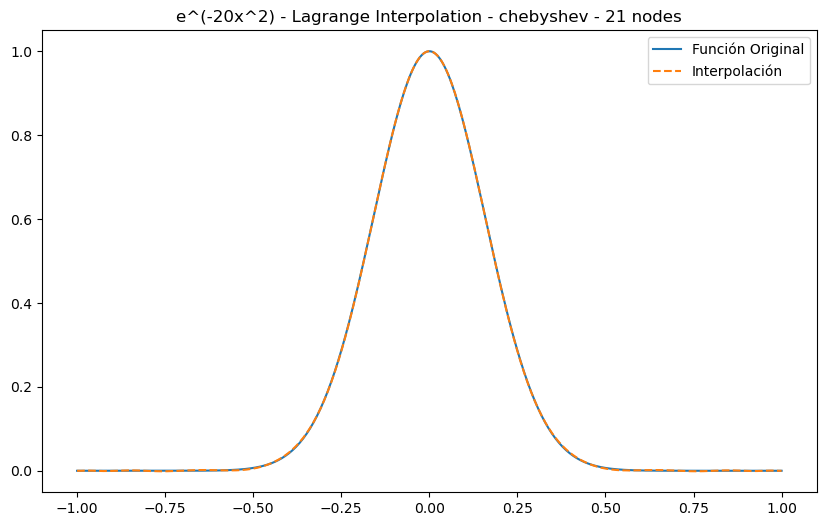

    Error Lagrange: 0.000782, Tiempo: 0.004841 segundos


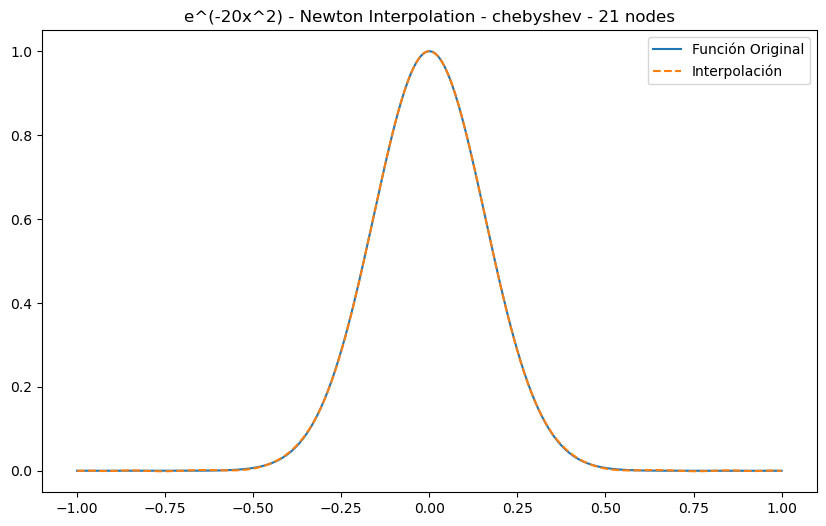

    Error Newton: 0.000782, Tiempo: 0.001577 segundos



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate, lagrange
from scipy.interpolate import CubicSpline
import time

# Definición de las funciones
def f1(x):
    return np.sin(x)

def f2(x):
    return 1 / (1 + 25 * x**2)

def f3(x):
    return np.exp(-20 * x**2)

#nodos equiespaciados y  de Chebyshev
def generate_nodes(n, method='equidistant'):
    if method == 'equidistant':
        return np.linspace(-1, 1, n)
    elif method == 'chebyshev':
        return np.cos(np.linspace(0, np.pi, n))

# Interpolacion de diferencias divididas de Newton
def newton_divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1, n):
        for i in range(n-j):
            coef[i,j] = (coef[i+1,j-1] - coef[i,j-1]) / (x[i+j] - x[i])

    return coef[0, :]  # coeficientes del polinomio

def newton_poly(coef, x_data, x):
    n = len(coef) - 1
    poly = coef[n]
    for k in range(1, n + 1):
        poly = coef[n - k] + (x - x_data[n - k]) * poly
    return poly

# calculo del error
def calculate_error(f, P, x):
    return np.abs(f(x) - P(x))

# graphs
def plot_results(x, y_true, y_interp, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_true, label='Función Original')
    plt.plot(x, y_interp, label='Interpolación', linestyle='--')
    plt.title(title)
    plt.legend()
    plt.show()


def main():
    functions = [f1, f2, f3]
    func_names = ['sin(x)', '1 / (1 + 25x^2)', 'e^(-20x^2)']
    n_nodes = [11, 21]
    methods = ['equidistant', 'chebyshev']
    
    x_dense = np.linspace(-1, 1, 400)
    
    for func, name in zip(functions, func_names):
        print(f"Resultados para la función: {name}")
        for n in n_nodes:
            for method in methods:
                print(f"  Número de nodos: {n}, Método: {method}")
                
                nodes = generate_nodes(n, method)
                values = func(nodes)
                
                # interpolacion baricentrica
                start_time = time.time()
                interp_bary = barycentric_interpolate(nodes, values, x_dense)
                end_time = time.time()
                error_bary = calculate_error(func, lambda x: barycentric_interpolate(nodes, values, x), x_dense)
                time_bary = end_time - start_time
                
                plot_results(x_dense, func(x_dense), interp_bary, f"{name} - Barycentric Interpolation - {method} - {n} nodes")
                print(f"    Error Baricéntrico: {np.mean(error_bary):.6f}, Tiempo: {time_bary:.6f} segundos")

                # interpolacion lagrange
                start_time = time.time()
                poly_lagrange = lagrange(nodes, values)
                end_time = time.time()
                interp_lagrange = poly_lagrange(x_dense)
                error_lagrange = calculate_error(func, poly_lagrange, x_dense)
                time_lagrange = end_time - start_time
                
                plot_results(x_dense, func(x_dense), interp_lagrange, f"{name} - Lagrange Interpolation - {method} - {n} nodes")
                print(f"    Error Lagrange: {np.mean(error_lagrange):.6f}, Tiempo: {time_lagrange:.6f} segundos")

                # interpol Newton
                start_time = time.time()
                coef_newton = newton_divided_diff(nodes, values)
                interp_newton = [newton_poly(coef_newton, nodes, x) for x in x_dense]
                end_time = time.time()
                error_newton = calculate_error(func, lambda x: newton_poly(coef_newton, nodes, x), x_dense)
                time_newton = end_time - start_time
                
                plot_results(x_dense, func(x_dense), interp_newton, f"{name} - Newton Interpolation - {method} - {n} nodes")
                print(f"    Error Newton: {np.mean(error_newton):.6f}, Tiempo: {time_newton:.6f} segundos\n")

if __name__ == "__main__":
    main()
